
UPLOADING DATASET TO THE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/MBRS.csv"

In [3]:
!pip install matplotlib-venn

In [4]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.8 MB/s eta 0:00:00


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tensorflow as tf
from tensorflow import keras
from gensim.models import word2vec
import neattext as nfx
import re
from nltk.corpus import stopwords
from glob import glob
import torch.nn.functional as F
from transformers import AutoTokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

In [6]:
data = pd.read_csv(file_path)

In [7]:
data.isna().sum()

Unnamed: 0             0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
img_s                  0
img_m                  0
img_l                  0
Summary                0
Language               0
Emotions               0
dtype: int64

In [8]:
data.head(6)

,Unnamed: 0,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Emotions
0,120931,553375407,5,Ishmael: An Adventure of the Mind and Spirit,Daniel Quinn,1995,Bantam,http://images.amazon.com/images/P/0553375407.0...,http://images.amazon.com/images/P/0553375407.0...,http://images.amazon.com/images/P/0553375407.0...,"So begins Ishmael, an utterly unique and capti...",en,happy
1,897477,771069618,5,Writing Home: A Pen Canada Anthology (Writing ...,Constance Rooke,1997,McClelland & Stewart,http://images.amazon.com/images/P/0771069618.0...,http://images.amazon.com/images/P/0771069618.0...,http://images.amazon.com/images/P/0771069618.0...,"A sequel to Writing Away, the acclaimed and su...",en,neutral
2,619033,440201780,6,Cherry Blossom Corpse,Robert Barnard,1988,Dell Publishing Company,http://images.amazon.com/images/P/0440201780.0...,http://images.amazon.com/images/P/0440201780.0...,http://images.amazon.com/images/P/0440201780.0...,When Scotland Yard&#39;s Perry Trethowan accom...,en,sadness
3,629118,449148602,5,So This Is Love,Elaine Coffman,1993,Fawcett Books,http://images.amazon.com/images/P/0449148602.0...,http://images.amazon.com/images/P/0449148602.0...,http://images.amazon.com/images/P/0449148602.0...,California timber baron Adrian Mackinnon wants...,en,sadness
4,578449,448090988,7,"The Mystery at Snow Lodge (The Bobbsey Twins, ...",Laura Lee Hope,1990,Grosset & Dunlap,http://images.amazon.com/images/P/0448090988.0...,http://images.amazon.com/images/P/0448090988.0...,http://images.amazon.com/images/P/0448090988.0...,The twins clear Dave Burdock of a larceny char...,en,neutral
5,202146,440235596,9,Tara Road,Maeve Binchy,2000,Dell Publishing Company,http://images.amazon.com/images/P/0440235596.0...,http://images.amazon.com/images/P/0440235596.0...,http://images.amazon.com/images/P/0440235596.0...,TARA ROAD is the unforgettable story of two wo...,en,happy


In [9]:
data.drop(columns=['Unnamed: 0', 'img_s', 'img_l'], inplace=True)

In [10]:
data.head(5)

,isbn,rating,book_title,book_author,year_of_publication,publisher,img_m,Summary,Language,Emotions
0,553375407,5,Ishmael: An Adventure of the Mind and Spirit,Daniel Quinn,1995,Bantam,http://images.amazon.com/images/P/0553375407.0...,"So begins Ishmael, an utterly unique and capti...",en,happy
1,771069618,5,Writing Home: A Pen Canada Anthology (Writing ...,Constance Rooke,1997,McClelland & Stewart,http://images.amazon.com/images/P/0771069618.0...,"A sequel to Writing Away, the acclaimed and su...",en,neutral
2,440201780,6,Cherry Blossom Corpse,Robert Barnard,1988,Dell Publishing Company,http://images.amazon.com/images/P/0440201780.0...,When Scotland Yard&#39;s Perry Trethowan accom...,en,sadness
3,449148602,5,So This Is Love,Elaine Coffman,1993,Fawcett Books,http://images.amazon.com/images/P/0449148602.0...,California timber baron Adrian Mackinnon wants...,en,sadness
4,448090988,7,"The Mystery at Snow Lodge (The Bobbsey Twins, ...",Laura Lee Hope,1990,Grosset & Dunlap,http://images.amazon.com/images/P/0448090988.0...,The twins clear Dave Burdock of a larceny char...,en,neutral


In [11]:
# Rename data to books
books = data

In [12]:
books.columns

Index(['isbn', 'rating', 'book_title', 'book_author', 'year_of_publication',
       'publisher', 'img_m', 'Summary', 'Language', 'Emotions'],
      dtype='object')

In [13]:
print(books.shape)

(30000, 10)


In [14]:
book = pd.DataFrame(books)

In [15]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   isbn                 30000 non-null  object
 1   rating               30000 non-null  int64 
 2   book_title           30000 non-null  object
 3   book_author          30000 non-null  object
 4   year_of_publication  30000 non-null  int64 
 5   publisher            30000 non-null  object
 6   img_m                30000 non-null  object
 7   Summary              30000 non-null  object
 8   Language             30000 non-null  object
 9   Emotions             30000 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.3+ MB


In [22]:
print(books.Summary[1900])

Here are more true stories that capture the essence of what it means
to be a woman and that honor the unforgettable experience of
mothering, from the heartwarming and hilarious to the bittersweet: a
mother sending her child off to school, ...


In [23]:
# This function is designed to remove HTML tags from the text, ensuring cleaner and more readable summaries.
book['Summary'] = book['Summary'].apply(nfx.remove_html_tags)

In [25]:
books['Summary'][40]

'Despite the fact that she has fallen in love with a young man, Tita,\nthe youngest of three daughters born to a tyrannical ranch must obey\ntradition and remain single and at home to care for her mother.'

In [24]:
books = books[~books['Summary'].isna()]

In [26]:
def check_text(sample=20):
  for i in range(sample):
    print(f'{i+1}) {books.Summary.sample(sample).iloc[i]}\n')

In [27]:
check_text(10)

1) Christian counselors have long needed a manual they could give couples
before marriage counseling so they would be guided to think through
all the important issues of marriage. This manual abundantly fulfills
that need.

2) A disturbing letter from her sister, married to a famed Bombay film
director, draws London journalist Rosalind Bengal back to her native
India, where a series of strange and chaotic events threatens her life
and takes her back into the dark ...

3) Investigating a young woman&#39;s strange behavior for her
overprotective father, the nameless detective finds himself drawn into
a case of deadly physical and psychological torture

4) not specified

5) . . MARRIED AT MIDNIGHT by JO BEVERLEY A women abandoned on the
battlefield discovers that dreams can cone true when an honorable
commanding officer gallantly offers his name. . .

6) During an unfortunate helicopter ride into the wilds of Alaska,
successful screenwriter Lou Calabrese is reunited with sexy Jack
Townsen

In [28]:
print(books['Emotions'].unique())

['happy' 'neutral' 'sadness' 'fear' 'disgust' 'anger' 'surprise']


In [29]:
# Replace values in the 'Emotions' column
books['Emotions'] = books['Emotions'].replace({'surprise': 'happy', 'fear': 'sadness', 'disgust': 'sadness', 'anger': 'sadness'})

# Verify the unique values after renaming
print(books['Emotions'].unique())

['happy' 'neutral' 'sadness']


In [30]:
# Replace value in the 'Emotions' column
books['Emotions'] = books['Emotions'].replace({'sadness': 'sad'})

# Verify the unique values after renaming
print(books['Emotions'].unique())

['happy' 'neutral' 'sad']


In [31]:
print(books['Language'].unique())

['en' 'not specified' 'de' 'fr' 'es' 'it' 'da' 'nl' 'el' 'ja' 'gl' 'pt'
 'zh-CN' 'ca' 'no' 'tl']


The given language codes are:

en: English not specified de: German fr: French es: Spanish it: Italian da: Danish nl: Dutch el: Greek ja: Japanese gl: Galician pt: Portuguese zh-CN: Chinese (Simplified) ca: Catalan no: Norwegian tl: Filipino (Tagalog)

In [32]:
# Count the number of rows with the value "non specified" in the "Summary" column
num_non_specified = (books['Summary'] == 'not specified').sum()
print(f"Number of rows with 'non specified' in the 'Summary' column: {num_non_specified}")

Number of rows with 'non specified' in the 'Summary' column: 8085


In [33]:
#'Emotions' is the column containing emotions
emotions_column = 'Emotions'

# Combine all the values in the 'emotions' column into a single string
all_emotions_text = ' '.join(books[emotions_column].astype(str))

# Convert the text to lowercase to ensure case-insensitive counting
all_emotions_text = all_emotions_text.lower()

# Define the list of target emotions
target_emotions = ['happy', 'sad', 'neutral']

# Count the occurrences of each target emotion
word_counts = {emotion: all_emotions_text.count(emotion) for emotion in target_emotions}

# Display the word counts
for emotion, count in word_counts.items():
    print(f'{emotion}: {count} books')

happy: 5071 books
sad: 7557 books
neutral: 17372 books


<ipython-input-34-1fa2c9938553>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Emotions', data= books,  palette=gradient_palette)


<Axes: xlabel='Emotions', ylabel='count'>

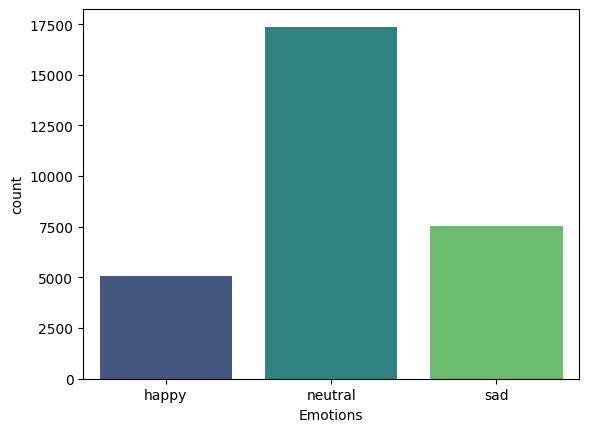

In [34]:
# Creating a countplot using Seaborn
gradient_palette = sns.color_palette("viridis", n_colors=len(books['Emotions'].unique()))
sns.countplot(x ='Emotions', data= books,  palette=gradient_palette)

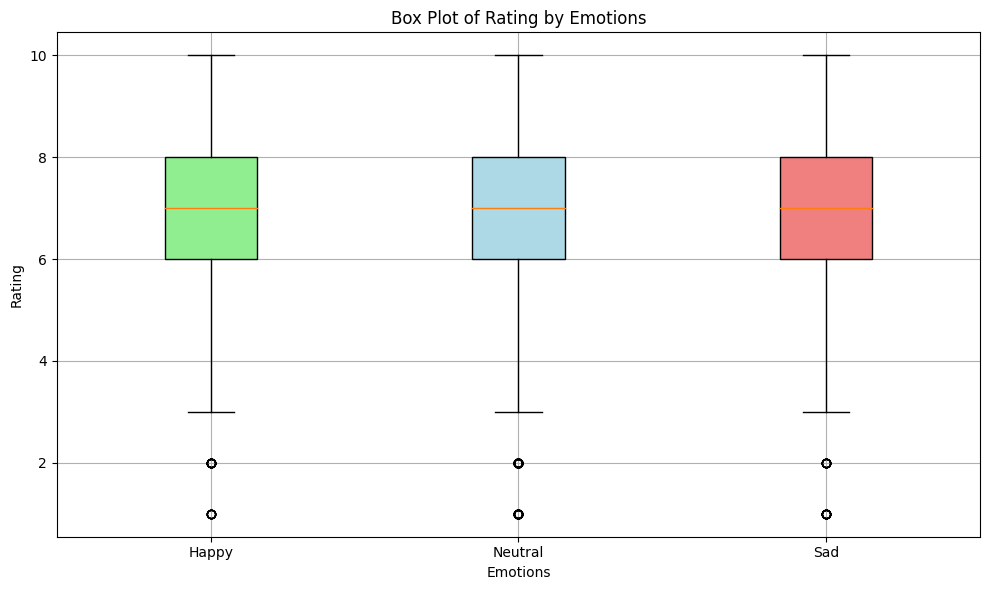

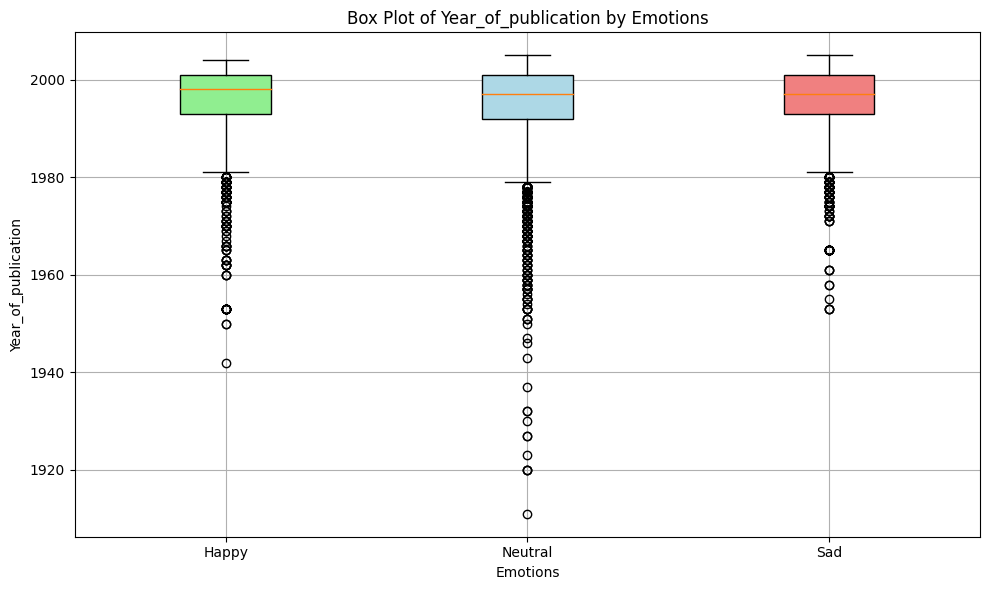

In [35]:
# Filter the dataset for only three emotions: happy, neutral, and sad
filtered_data = books[books['Emotions'].isin(['happy', 'neutral', 'sad'])]

# Define attributes to include in the box plot
attributes = ['rating', 'year_of_publication']

# Create a box plot for each attribute grouped by emotions
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    plt.title(f'Box Plot of {attribute.capitalize()} by Emotions')
    plt.xlabel('Emotions')
    plt.ylabel(attribute.capitalize())

    # Group data by emotions
    grouped_data = filtered_data.groupby('Emotions')[attribute]

    # Create box plot
    bp = plt.boxplot([grouped_data.get_group('happy'),
                      grouped_data.get_group('neutral'),
                      grouped_data.get_group('sad')],
                     patch_artist=True)

    # Customize colors for the box plot
    colors = ['lightgreen', 'lightblue', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    plt.grid(True)
    plt.xticks([1, 2, 3], ['Happy', 'Neutral', 'Sad'])
    plt.tight_layout()

plt.show()

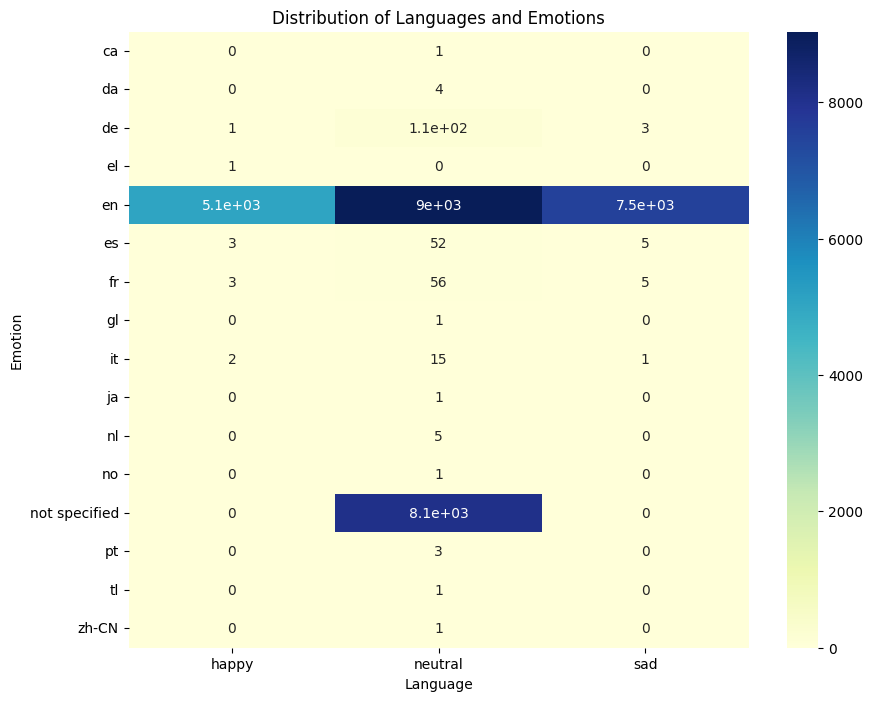

In [36]:
heatmap_data = pd.crosstab(books['Language'], books['Emotions'], margins=False)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Distribution of Languages and Emotions')
plt.xlabel('Language')
plt.ylabel('Emotion')
plt.show()


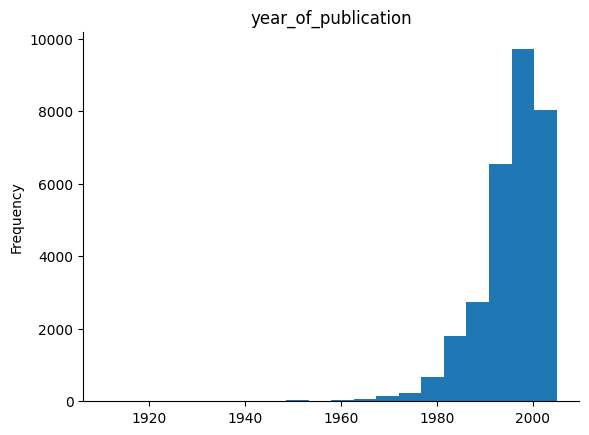

In [16]:
book['year_of_publication'].plot(kind='hist', bins=20, title='year_of_publication')
plt.gca().spines[['top', 'right',]].set_visible(False)

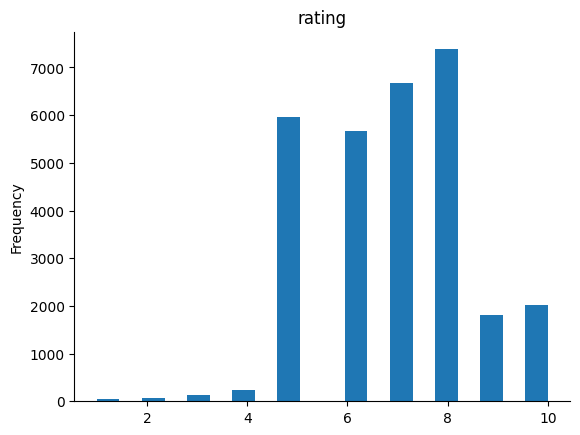

In [17]:
book['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-37-392d4cb45ee5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


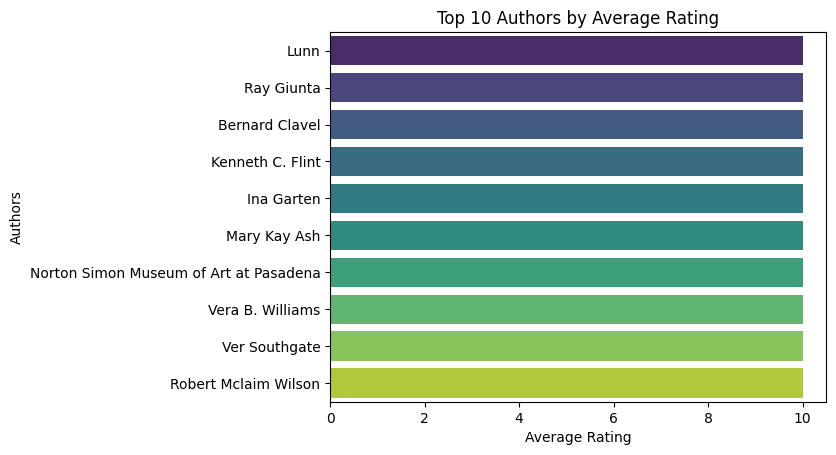

In [37]:
#Bar plot for top authors by average rating
top_authors = books.groupby('book_author')['rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Authors')
plt.show()

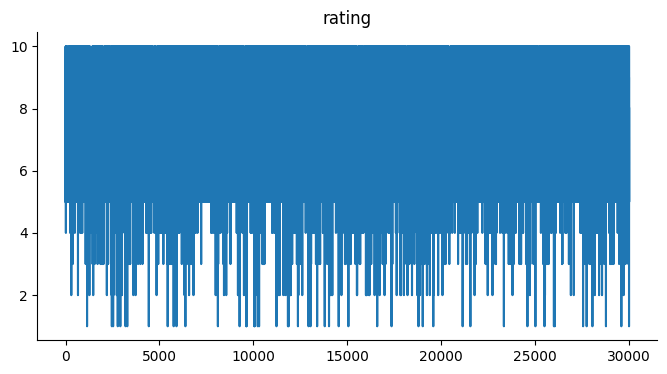

In [20]:
from matplotlib import pyplot as plt
book['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('michellejieli/emotion_text_classifier')
model = TFAutoModelForSequenceClassification.from_pretrained('michellejieli/emotion_text_classifier', from_pt=True)

def emotion_classifier(text):
    inputs = tokenizer(
        text,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors='tf'
    )

    outputs = model(inputs)
    logits = outputs.logits
    probabilities = tf.nn.softmax(logits, axis=1)
    predicted_class = tf.argmax(probabilities, axis=1)
    scores = probabilities[0, predicted_class[0]].numpy()
    label = model.config.id2label[predicted_class[0].numpy()]

    return [{'label': label, 'scores': scores}]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a

In [39]:
emotion_classifier('I am feeling quite joyful today!')

[{'label': 'joy', 'scores': 0.99540544}]

In [40]:
emotion_classifier('I am feeling very sad today!')

[{'label': 'sadness', 'scores': 0.9846274}]

In [46]:
# Filter the DataFrame to get the rows where Emotions is 'happy' and rating is 10
happy_books_rating_10 = books[(books['Emotions'] == 'happy') & (book['rating'] == 10)]

# Get the total number of happy books with rating 10
total_happy_books_rating_10 = happy_books_rating_10.shape[0]

print("Total number of happy books with rating 10:", total_happy_books_rating_10)

Total number of happy books with rating 10: 432


In [47]:
# Display the happy books with rating 10
print("Happy books with rating 10:")
print(happy_books_rating_10[['book_title', 'img_m']].head())

Happy books with rating 10:
                                            book_title  \
12   The Skeptic's Dictionary: A Collection of Stra...   
364                     Poultry (The Good Cook Series)   
397                                               Cujo   
446                              To Kill a Mockingbird   
514                         The Nanny Diaries: A Novel   

                                                 img_m  
12   http://images.amazon.com/images/P/0471272426.0...  
364  http://images.amazon.com/images/P/0809428504.0...  
397  http://images.amazon.com/images/P/0451161351.0...  
446  http://images.amazon.com/images/P/0446310786.0...  
514  http://images.amazon.com/images/P/0312278586.0...  


In [48]:
# Filter the DataFrame to get the rows where Emotions is 'sad' and rating is 10
sad_books_rating_10 = books[(books['Emotions'] == 'sad') & (book['rating'] == 10)]

# Get the total number of happy books with rating 10
total_sad_book_rating_10 = sad_books_rating_10.shape[0]

print("Total number of sad book with rating 10:", total_sad_book_rating_10)

Total number of sad book with rating 10: 426


In [49]:
# Display the sad books with rating 10
print("Sad books with rating 10:")
print(sad_books_rating_10[['book_title', 'img_m']].head())

Sad books with rating 10:
                                            book_title  \
17    The Book of Ruth (Oprah's Book Club (Paperback))   
327                     Cycle of the Werewolf (Signet)   
346                Sharpes Eagle (Sharpe's Adventures)   
460  The Killing Game: Only One Can Win...and the L...   
509                                   Family Blessings   

                                                 img_m  
17   http://images.amazon.com/images/P/0385265700.0...  
327  http://images.amazon.com/images/P/0451822196.0...  
346  http://images.amazon.com/images/P/0140294309.0...  
460  http://images.amazon.com/images/P/0553581554.0...  
509  http://images.amazon.com/images/P/0515115630.0...  


In [50]:
# Assigning the result to a variable
top_sad_books = sad_books_rating_10[['book_title', 'img_m']]

# Printing the variable
print(top_sad_books)

                                              book_title  \
17      The Book of Ruth (Oprah's Book Club (Paperback))   
327                       Cycle of the Werewolf (Signet)   
346                  Sharpes Eagle (Sharpe's Adventures)   
460    The Killing Game: Only One Can Win...and the L...   
509                                     Family Blessings   
...                                                  ...   
29729  Without a Trace: The Disappearance of Amy Bill...   
29757                                               Lost   
29801                       Suzanne's Diary for Nicholas   
29851                                       The Brethren   
29993                                  Don't Hurt Laurie   

                                                   img_m  
17     http://images.amazon.com/images/P/0385265700.0...  
327    http://images.amazon.com/images/P/0451822196.0...  
346    http://images.amazon.com/images/P/0140294309.0...  
460    http://images.amazon.com/images/P/05

In [51]:
# Filter the DataFrame to get the rows where Emotions is 'neutral' and rating is 10
neutral_books_rating_10 = books[(books['Emotions'] == 'neutral') & (books['rating'] == 10)]

# Get the total number of happy books with rating 10
total_sad_book_rating_10 = neutral_books_rating_10.shape[0]

print("Total number of sad book with rating 10:", total_sad_book_rating_10)

Total number of sad book with rating 10: 1151


In [52]:
# Display the neutral books with rating 10
print("Neutral books with rating 10:")
print(neutral_books_rating_10[['book_title', 'img_m']].head())

Neutral books with rating 10:
                                            book_title  \
29                                   The King of Torts   
30   Meditations from the breakdown lane: Running a...   
59                    East of Eden (Oprah's Book Club)   
102                                       Cashelmara 2   
183                         Linda Goodman's Star Signs   

                                                 img_m  
29   http://images.amazon.com/images/P/0440241537.0...  
30   http://images.amazon.com/images/P/0394514386.0...  
59   http://images.amazon.com/images/P/0142004235.0...  
102  http://images.amazon.com/images/P/0449241076.0...  
183  http://images.amazon.com/images/P/0312912633.0...  


In [66]:
def recommend_books_by_mood(user_mood, num_recommendations=5):
    # Filter books based on mood
    mood_books = book[book['Emotions'] == user_mood]

    # Sort books by rating in descending order
    mood_books = mood_books.sort_values(by='rating', ascending=False)

    # Select a limited number of recommendations
    recommended_books = mood_books.head(num_recommendations)

    return recommended_books

# Get user input for mood
user_mood = input("Enter your mood: ")

# Get recommended books
recommended_books = recommend_books_by_mood(user_mood)

# Display recommended books
print(f"Recommended Top Rated Books for '{user_mood}':")
for index, row in recommended_books.iterrows():
    print(f"{row['book_title']} by {row['img_m']}, {row['rating']})")

Enter your mood: happy
Recommended Top Rated Books for 'happy':
The Tarot Book: Basic Instruction for Reading Cards by http://images.amazon.com/images/P/0877287236.01.MZZZZZZZ.jpg, 10)
The Dream Songs by http://images.amazon.com/images/P/0374516707.01.MZZZZZZZ.jpg, 10)
Tore Out My Heart by http://images.amazon.com/images/P/0446370398.01.MZZZZZZZ.jpg, 10)
Dead Poets Society by http://images.amazon.com/images/P/0553282980.01.MZZZZZZZ.jpg, 10)
Irish Hearts by http://images.amazon.com/images/P/0373484003.01.MZZZZZZZ.jpg, 10)


In [67]:
def content_based_recommender(book_title):
    book_title = str(book_title)
    # Check if the book exists in the dataset
    if book_title in book['book_title'].values:
        # Get the emotion attribute of the input book
        input_emotion = book[book['book_title'] == book_title]['Emotions'].values[0]
        # Get top-rated books with the same emotion attribute
        top_related_books = book[(book['emotion_attribute'] == input_emotion) & (book['rating'] == 5)]
        # Recommend the top-rated related books
        if not top_related_books.empty:
            print('Top-rated books related to the input book\'s emotion attribute:')
            for i in range(min(5, len(top_related_books))):
                print(top_related_books.sample(1)['book_title'].item())
        else:
            print('No top-rated books found related to the input book\'s emotion attribute')
    else:
        print('Book not found in the dataset')


In [70]:
# Calling the content_based_recommender function with the title of the book
content_based_recommender("The Great Gatsby")


Books with the same rating:
Milkrun
Harm's Way
Under the Wishing Star (Star Trilogy (Paperback))
Wild Animus
ROMEO AND JULIET


In [78]:
def content_based_recommender(book_title):
    book_title = str(book_title)
    # Check if the book exists in the dataset
    if book_title in book['book_title'].values:
        # Get the emotion attribute of the input book
        input_emotion = book[book['book_title'] == book_title]['Emotions'].values[0]
        # Get top-rated books with the same emotion attribute
        top_related_books = book[(book['Emotions'] == input_emotion) & (book['rating'] == 10)]
        # Recommend the top-rated related books
        if not top_related_books.empty:
            print('Top-rated books related to the input book\'s Emotions:')
            for i in range(min(5, len(top_related_books))):
                recommended_book = top_related_books.sample(1)
                print(f"{recommended_book['book_title'].item()} (Rating: {recommended_book['rating'].item()})")
        else:
            print('No top-rated books found related to the input book\'s emotion attribute')
    else:
        print('Book not found in the dataset')


In [79]:
content_based_recommender("The Catcher in the Rye")

Top-rated books related to the input book's Emotions:
ADD-Friendly Ways to Organize Your Life (Rating: 10)
Heart of the Home : Notes From a Vineyard Kitchen (Rating: 10)
The Big Book of Beastly Mispronunciations : The Complete Opinionated Guide for the Careful Speaker (Rating: 10)
About a Boy (Movie Tie-In) (Rating: 10)
Watership Down (Rating: 10)


In [80]:
content_based_recommender('Secret Codes 2003')

Top-rated books related to the input book's Emotions:
Ever After : A Cinderella Story (Laurel-Leaf Books) (Rating: 10)
Natural Causes (Rating: 10)
The Birds of Heaven: Travels with Cranes (Rating: 10)
The True Story of the 3 Little Pigs (Rating: 10)
Some Bitter Taste (Marshal Guarnaccia Investigation (Paperback)) (Rating: 10)


In [81]:
def content_based_recommender(book_title):
    book_title = str(book_title)
    # Check if the book exists in the dataset
    if book_title in book['book_title'].values:
        # Get the emotion attribute of the input book
        input_emotion = book[book['book_title'] == book_title]['Emotions'].values[0]

        # Get top-rated books with the same emotion attribute
        top_related_books = book[(book['Emotions'] == input_emotion) & ((book['rating'] >= 4) & (book['rating'] <= 8))]

        # Recommend the top-rated related books
        if not top_related_books.empty:
            print('Top-rated books related to the input book\'s emotion attribute:')
            for i in range(min(5, len(top_related_books))):
                recommended_book = top_related_books.sample(1)
                print(f"{recommended_book['book_title'].item()} (Rating: {recommended_book['rating'].item()})")
        else:
            print('No top-rated books found related to the input book\'s emotion attribute')

        # Recommend additional books with ratings from 4 to 8 with the same emotion attribute
        additional_related_books = book[(book['Emotions'] == input_emotion) & ((book['rating'] >= 4) & (book['rating'] <= 8))]
        if not additional_related_books.empty:
            print('\nYou might also like these books:')
            for i in range(min(5, len(additional_related_books))):
                recommended_book = additional_related_books.sample(1)
                print(f"{recommended_book['book_title'].item()} (Rating: {recommended_book['rating'].item()})")
    else:
        print('Book not found in the dataset')


In [82]:
content_based_recommender('Secret Codes 2003')

Top-rated books related to the input book's emotion attribute:
A Time to Kill (Rating: 7)
Momo (Spanish Language Edition) (Rating: 7)
The Heart Aroused : Poetry and the Preservation of the Soul in Corporate America (Rating: 7)
Alice's Adventures in Wonderland/With All the Original Illustrations by Sir John Tenniel (Dover Thrift Editions) (Rating: 5)
CONTACT (Rating: 7)

You might also like these books:
Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson (Rating: 8)
Hemlock Bay (Rating: 8)
The Liar's Club: A Memoir (Rating: 8)
The Temple of My Familiar (Rating: 5)
Standoff (Rating: 7)


In [83]:
import random

# Select 10 random books from top_sad_books
selected_sad_books = top_sad_books.sample(10)

# Select 10 random books from happy_books_rating_10
selected_happy_books = happy_books_rating_10.sample(10)

# Combine the selected books
combined_books = pd.concat([selected_sad_books, selected_happy_books], ignore_index=True)

# Print the selected books with their titles and image URLs
print("Selected Random Books:")
print(combined_books[['book_title', 'img_m']])

Selected Random Books:
                                           book_title  \
0                  The Edge of the Crazies: A Mystery   
1                                          Dead Wrong   
2                                    The Evening Star   
3                            Angela's Ashes: A Memoir   
4                        Suzanne's Diary for Nicholas   
5                                   Presumed Innocent   
6   Troublemaker: One Man's Crusade Against China'...   
7                                        Illumination   
8     Divine Secrets of the Ya-Ya Sisterhood: A Novel   
9               A Band of Brothers (Lost Regiment, 7)   
10                                1st to Die: A Novel   
11                                         Blood Work   
12                      La Cucina: A Novel of Rapture   
13                              To Kill a Mockingbird   
14                                       Shoeless Joe   
15                                        INHERITANCE   
16      

In [84]:
# Previous code for selecting random 10 books from both top_sad_books and happy_books_rating_10 and displaying book_title and img_m

combination_of_happy_and_sad = "Combination of happy and sad books:\n"

for index, row in combined_books[['book_title', 'img_m']].iterrows():
    combination_of_happy_and_sad += f"{row['book_title']} - {row['img_m']}\n"

print(combination_of_happy_and_sad)

Combination of happy and sad books:
The Edge of the Crazies: A Mystery - http://images.amazon.com/images/P/0786860855.01.MZZZZZZZ.jpg
Dead Wrong - http://images.amazon.com/images/P/0345463927.01.MZZZZZZZ.jpg
The Evening Star - http://images.amazon.com/images/P/0671004271.01.MZZZZZZZ.jpg
Angela's Ashes: A Memoir - http://images.amazon.com/images/P/068484267X.01.MZZZZZZZ.jpg
Suzanne's Diary for Nicholas - http://images.amazon.com/images/P/0446611085.01.MZZZZZZZ.jpg
Presumed Innocent - http://images.amazon.com/images/P/0446350982.01.MZZZZZZZ.jpg
Troublemaker: One Man's Crusade Against China's Cruelty - http://images.amazon.com/images/P/0812963741.01.MZZZZZZZ.jpg
Illumination - http://images.amazon.com/images/P/0812540034.01.MZZZZZZZ.jpg
Divine Secrets of the Ya-Ya Sisterhood: A Novel - http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg
A Band of Brothers (Lost Regiment, 7) - http://images.amazon.com/images/P/0451457056.01.MZZZZZZZ.jpg
1st to Die: A Novel - http://images.amazon.c

In [85]:
class MoodMeter:
    def __init__(self):
        self.mood_scores = {
            'Happy': 0,
            'Neutral': 0,
            'Sad': 0,

        }

    def ask_question(self, question):
        response = input(question + " (Enter a rating from 1 to 5, where 1 is strongly disagree and 5 is strongly agree): ")
        try:
            rating = int(response)
            if 1 <= rating <= 5:
                return rating
            else:
                print("Invalid response. Please enter a number between 1 and 5.")
                return self.ask_question(question)
        except ValueError:
            print("Invalid response. Please enter a number between 1 and 5.")
            return self.ask_question(question)

    def assess_mood(self):
        print("Mood Assessment:")
        self.mood_scores['Happy'] += self.ask_question("I feel happy today.")
        self.mood_scores['Neutral'] += self.ask_question("I feel neither happy nor sad.")
        self.mood_scores['Sad'] += self.ask_question("I feel sad or down.")

    def get_dominant_mood(self):
        max_mood = max(self.mood_scores, key=self.mood_scores.get)
        print(f"\nYour dominant mood is: {max_mood}")
        return max_mood.lower()

def recommend_books_by_mood(user_mood):
    # Add your book recommendation logic based on user's mood here
    # For demonstration purposes, a simple dictionary is used.
    mood_books = {
        'happy': [(combination_of_happy_and_sad)],
        'sad': [(happy_books_rating_10[['book_title', 'img_m']].head(10))],
        'neutral': [(neutral_books_rating_10[['book_title', 'img_m']].head(10))]
    }

    return mood_books.get(user_mood, [])

if __name__ == "__main__":
    mood_meter_instance = MoodMeter()
    mood_meter_instance.assess_mood()
    user_mood = mood_meter_instance.get_dominant_mood()
    recommended_books = recommend_books_by_mood(user_mood)

    if recommended_books:
        print(f"\nRecommended Books for {user_mood.capitalize()} mood:")
        for book in recommended_books:
            print(f"- {book}")
    else:
        print(f"\nNo books found for {user_mood.capitalize()} mood. Try another mood.")

Mood Assessment:
I feel happy today. (Enter a rating from 1 to 5, where 1 is strongly disagree and 5 is strongly agree): 3
I feel neither happy nor sad. (Enter a rating from 1 to 5, where 1 is strongly disagree and 5 is strongly agree): 4
I feel sad or down. (Enter a rating from 1 to 5, where 1 is strongly disagree and 5 is strongly agree): 5

Your dominant mood is: Sad

Recommended Books for Sad mood:
-                                             book_title  \
12   The Skeptic's Dictionary: A Collection of Stra...   
364                     Poultry (The Good Cook Series)   
397                                               Cujo   
446                              To Kill a Mockingbird   
514                         The Nanny Diaries: A Novel   
517  Chic Simple Dress Smart for Women: Wardrobes t...   
673                                       Mondo Canine   
742                                           One Wish   
811                                   Golf for Dummies   
837         

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Pre-processing function to clean and lemmatize the text data
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W|\d', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a single string
    text = ' '.join(words)
    return text

# Pre-process the text data
books['Summary'] = books['Summary'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(books['Summary'], books['Emotions'], test_size=0.2, random_state=42)

# Create TF-IDF vectors from the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test_vectorized)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.812

Classification Report:
              precision    recall  f1-score   support

       happy       0.82      0.67      0.74      1032
     neutral       0.85      0.86      0.85      3454
         sad       0.73      0.81      0.77      1514

    accuracy                           0.81      6000
   macro avg       0.80      0.78      0.79      6000
weighted avg       0.81      0.81      0.81      6000

